In [2]:
#import library
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [3]:
#import data
df=pd.read_csv(r"C:\Users\q\Desktop\Case\ds_exercise_data.csv",sep=",")

In [4]:
#first 50 rows in dataframe
df.head(50)

,Date,CashIn,CashOut
0,1/1/2016,NaN,6500.0
1,1/2/2016,NaN,23110.0
2,1/3/2016,NaN,7070.0
3,1/4/2016,NaN,18520.0
4,1/5/2016,20840.0,22200.0
5,1/6/2016,28460.0,18810.0
6,1/7/2016,19250.0,23210.0
7,1/8/2016,49770.0,4350.0
8,1/9/2016,NaN,NaN
9,1/10/2016,19260.0,760.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 3 columns):
Date       1186 non-null object
CashIn     1081 non-null float64
CashOut    1098 non-null float64
dtypes: float64(2), object(1)
memory usage: 27.9+ KB


In [6]:
#data column turns the datatime 
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 3 columns):
Date       1186 non-null datetime64[ns]
CashIn     1081 non-null float64
CashOut    1098 non-null float64
dtypes: datetime64[ns](1), float64(2)
memory usage: 27.9 KB


### Missing Values

In [7]:
#to count how many NaN values in columns in dataframe
df.isnull().sum()

Date         0
CashIn     105
CashOut     88
dtype: int64

In [8]:
#to see the rows with nan value in CashIn column 
df[df["CashIn"].isnull()]

,Date,CashIn,CashOut
0,2016-01-01,NaN,6500.0
1,2016-01-02,NaN,23110.0
2,2016-01-03,NaN,7070.0
3,2016-01-04,NaN,18520.0
8,2016-01-09,NaN,NaN
...,...,...,...
1131,2019-02-05,NaN,NaN
1132,2019-02-06,NaN,NaN
1133,2019-02-07,NaN,NaN
1163,2019-03-09,NaN,NaN


### Feature Extraction
Creates time series features from Date column.

In [9]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day
df['week_day'] = pd.DatetimeIndex(df['Date']).dayofweek # with starting 0 from monday
df["weekday_or_weekend"]=[1 if i == 5 or i == 6 else 0 for i in df["week_day"]] # 0=weekday, 1=weekend

df

,Date,CashIn,CashOut,year,month,day,week_day,weekday_or_weekend
0,2016-01-01,NaN,6500.0,2016,1,1,4,0
1,2016-01-02,NaN,23110.0,2016,1,2,5,1
2,2016-01-03,NaN,7070.0,2016,1,3,6,1
3,2016-01-04,NaN,18520.0,2016,1,4,0,0
4,2016-01-05,20840.0,22200.0,2016,1,5,1,0
...,...,...,...,...,...,...,...,...
1181,2019-03-27,45160.0,48600.0,2019,3,27,2,0
1182,2019-03-28,39480.0,22840.0,2019,3,28,3,0
1183,2019-03-29,70260.0,25950.0,2019,3,29,4,0
1184,2019-03-30,19250.0,24350.0,2019,3,30,5,1


### Basic Data Analysis
The amount of money by years in descending order is for cash in.

In [10]:
df[["year","CashIn"]].groupby(["year"]).mean().sort_values(by="CashIn",ascending = False).reset_index()

,year,CashIn
0,2018,45740.964912
1,2019,41708.765432
2,2017,35074.517134
3,2016,29670.830861


The amount of money by months in descending order is for cash in.

In [11]:
df[["month","CashIn"]].groupby(["month"]).mean().sort_values(by="CashIn",ascending = False).reset_index()

,month,CashIn
0,8,43404.777778
1,10,40875.454545
2,6,38609.625000
3,11,38590.864198
4,3,38316.782609
5,7,38024.137931
6,9,37656.835443
7,1,36703.162393
8,5,36318.554217
9,4,35677.906977


The amount of money by days of month in descending order is for cash in.

In [12]:
df[["day","CashIn"]].groupby(["day"]).mean().sort_values(by="CashIn",ascending = False).reset_index()

,day,CashIn
0,8,43623.055556
1,17,42655.000000
2,15,41977.500000
3,6,41893.888889
4,16,40580.810811
5,26,40430.857143
6,7,40357.352941
7,23,39861.714286
8,25,39637.058824
9,27,39392.500000


The amount of money by years in descending order is for cash out.

In [13]:
df[["year","CashOut"]].groupby(["year"]).mean().sort_values(by="CashOut",ascending = False).reset_index()

,year,CashOut
0,2018,36772.514970
1,2019,34798.765432
2,2017,31994.732143
3,2016,23350.288184


The amount of money by months in descending order is for cash out.

In [14]:
df[["month","CashOut"]].groupby(["month"]).mean().sort_values(by="CashOut",ascending = False).reset_index()

,month,CashOut
0,8,34361.222222
1,10,33656.962025
2,3,33114.830508
3,6,32765.000000
4,4,32087.931034
5,7,32015.714286
6,2,32002.061856
7,5,29794.117647
8,11,29361.410256
9,9,28269.500000


The amount of money by days of month in descending order is for cash out.

In [15]:
df[["day","CashOut"]].groupby(["day"]).mean().sort_values(by="CashOut",ascending = False).reset_index()

,day,CashOut
0,7,57433.823529
1,15,50442.857143
2,6,48943.333333
3,5,48261.666667
4,8,44419.714286
5,9,37060.937500
6,16,36805.945946
7,1,32239.729730
8,2,31272.121212
9,10,30171.315789


### Visulations


As seen in the figure below, 
- Amount of money for cash in transactions is the most in 2018 and at least in 2016.


C:\Users\q\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\q\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


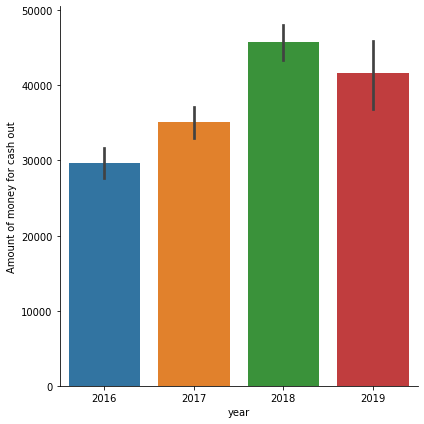

In [16]:
g = sns.factorplot(x = "year", y = "CashIn", data = df, kind = "bar", size = 6)
g.set_ylabels("Amount of money for cash out")
plt.show()

 Amount of money for cash out transaction is the most in 2018 and at least in 2016.

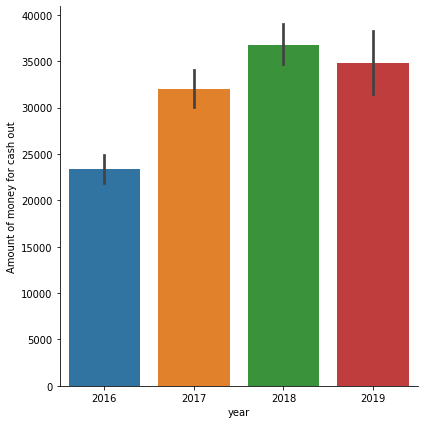

In [17]:
g = sns.factorplot(x = "year", y = "CashOut", data = df, kind = "bar", size = 6)
g.set_ylabels("Amount of money for cash out")
plt.show()

- The average distribution amount of money for cash in by the days of the week.
- Day of week also seems to show differences in peaks

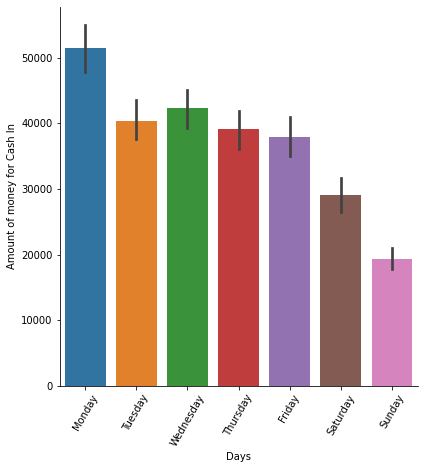

In [18]:
g = sns.factorplot(x = "week_day", y = "CashIn", data = df, kind = "bar", size = 6)
plt.xticks(rotation = 60)
g.set_xticklabels(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
g.set_xlabels("Days")
g.set_ylabels("Amount of money for Cash In")
plt.show()

-The average distribution amount of money for cash out by the days of the week.


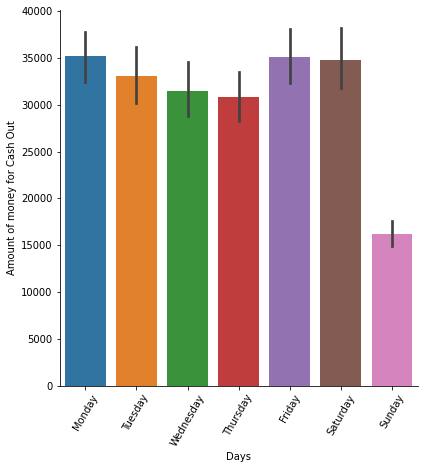

In [19]:
g = sns.factorplot(x = "week_day", y = "CashOut", data = df, kind = "bar", size = 6)
plt.xticks(rotation = 60)
g.set_xticklabels(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
g.set_xlabels("Days")
g.set_ylabels("Amount of money for Cash Out")
plt.show()

The average distribution amount of money for cash in by weekend or weekdays.

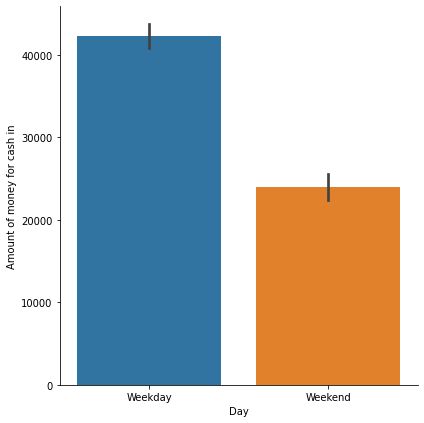

In [20]:
g = sns.factorplot(x = "weekday_or_weekend", y = "CashIn", data = df, kind = "bar", size = 6)
g.set_xticklabels(["Weekday","Weekend"])
g.set_xlabels("Day")
g.set_ylabels("Amount of money for cash in")
plt.show()

The average distribution amount of money for cash out by weekend or weekdays.

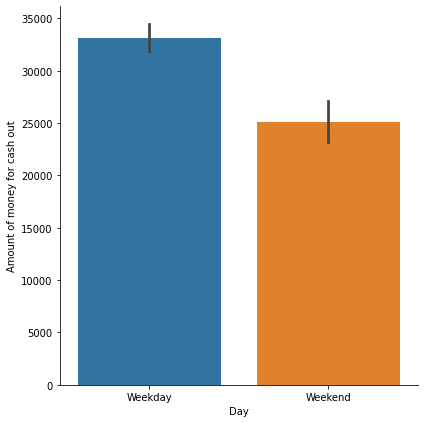

In [21]:
g = sns.factorplot(x = "weekday_or_weekend", y = "CashOut", data = df, kind = "bar", size = 6)
g.set_xticklabels(["Weekday","Weekend"])
g.set_xlabels("Day")
g.set_ylabels("Amount of money for cash out")
plt.show()

In [22]:
df.describe()

,CashIn,CashOut,year,month,day,week_day,weekday_or_weekend
count,1081.000000,1098.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000
mean,37261.618871,30923.041894,2017.150927,6.178752,15.717538,3.005059,0.286678
std,20583.186636,18315.118458,0.947564,3.534054,8.798464,2.001259,0.452401
min,100.000000,0.000000,2016.000000,1.000000,1.000000,0.000000,0.000000
25%,21690.000000,17947.500000,2016.000000,3.000000,8.000000,1.000000,0.000000
50%,34980.000000,27810.000000,2017.000000,6.000000,16.000000,3.000000,0.000000
75%,50280.000000,40350.000000,2018.000000,9.000000,23.000000,5.000000,1.000000
max,121300.000000,111700.000000,2019.000000,12.000000,31.000000,6.000000,1.000000


In [23]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

A graph showing what amount of aggregation for cash in and cash out.

C:\Users\q\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\q\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


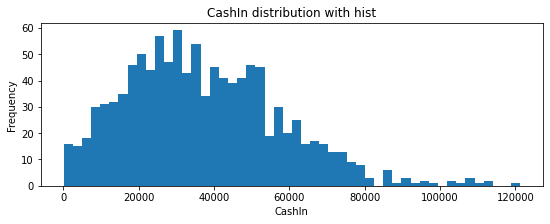

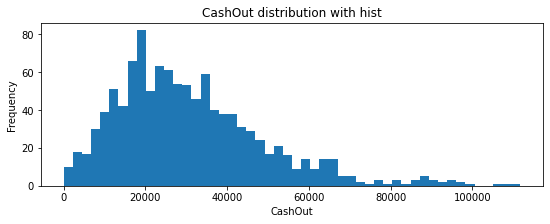

In [24]:
numericVar = ["CashIn", "CashOut"]
for n in numericVar:
    plot_hist(n)

### Plotting the Features to see trends
- Amount of money for cash in transaction has seasonal properties by years

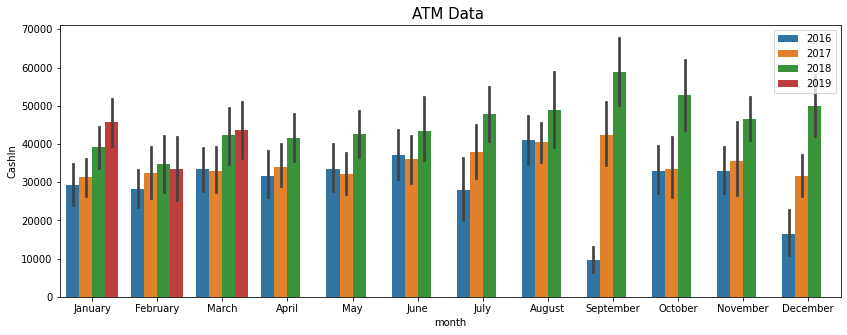

In [25]:
fig, ax = plt.subplots(figsize=(14,5))
palette = sns.color_palette("mako_r", 4)
a = sns.barplot(x="month", y="CashIn",hue = 'year',data=df)
a.set_xticklabels(["January","February","March","April","May","June","July","August","September","October","November","December"])
a.set_title("ATM Data ",fontsize=15)
plt.legend(loc='upper right')
plt.show()

Amount of money for cash in transaction has seasonal properties by years

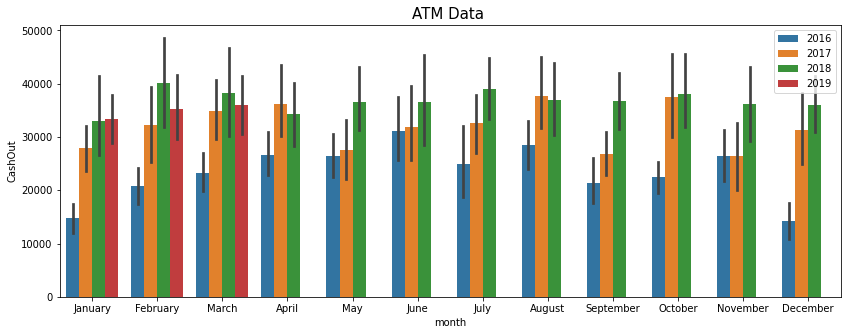

In [32]:
fig, ax = plt.subplots(figsize=(14,5))
palette = sns.color_palette("mako_r", 4)
a = sns.barplot(x="month", y="CashOut",hue = 'year',data=df)
a.set_xticklabels(["January","February","March","April","May","June","July","August","September","October","November","December"])
a.set_title("ATM Data ",fontsize=15)
plt.legend(loc='upper right')
plt.show()

Graph of average amounts of money for cash in as yearly, monthly and daily

C:\Users\q\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\q\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\q\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\q\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:3

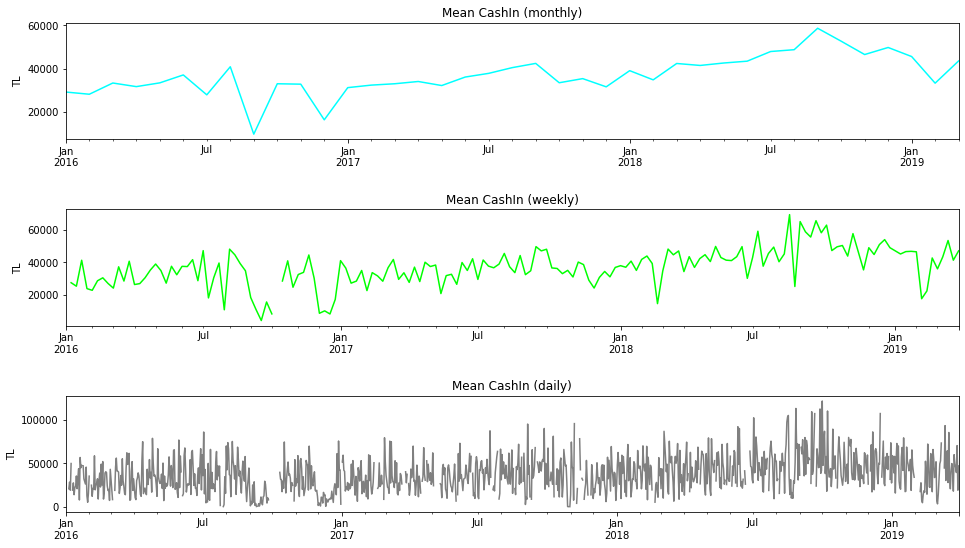

In [26]:

f,ax=plt.subplots(3,1,figsize=(16,9))

df1 = df.resample('M', on='Date').mean()
df2 = df.resample('W', on='Date').mean()
df3 = df.resample('D', on='Date').mean()

df1['CashIn'].plot(ax = ax[0], color = 'cyan')
ax[0].set_title('Mean CashIn (monthly)')
ax[0].set_xlabel('')
ax[0].set_ylabel('TL')

df2['CashIn'].plot(ax = ax[1], color = 'lime')
ax[1].set_title('Mean CashIn (weekly)')
ax[1].set_xlabel('')
ax[1].set_ylabel('TL')

df3['CashIn'].plot(ax = ax[2], color = 'grey')
ax[2].set_title('Mean CashIn (daily)')
ax[2].set_xlabel('')
ax[2].set_ylabel('TL')

f.subplots_adjust(hspace=0.6)
plt.show()

Graph of average amounts of money for cash out as yearly, monthly and daily.

C:\Users\q\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\q\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\q\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\q\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:3

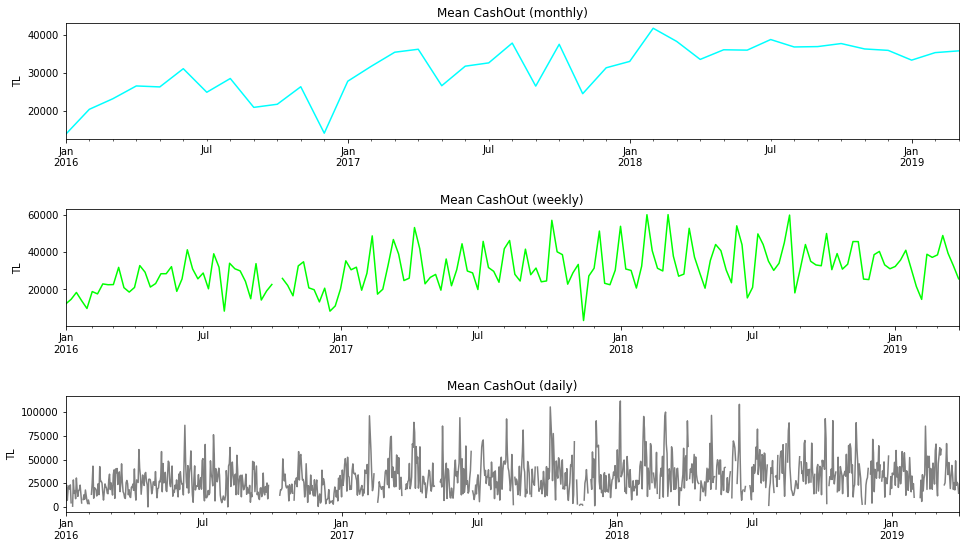

In [27]:
f,ax=plt.subplots(3,1,figsize=(16,9))

df1 = df.resample('M', on='Date').mean()
df2 = df.resample('W', on='Date').mean()
df3 = df.resample('D', on='Date').mean()

df1['CashOut'].plot(ax = ax[0], color = 'cyan')
ax[0].set_title('Mean CashOut (monthly)')
ax[0].set_xlabel('')
ax[0].set_ylabel('TL')

df2['CashOut'].plot(ax = ax[1], color = 'lime')
ax[1].set_title('Mean CashOut (weekly)')
ax[1].set_xlabel('')
ax[1].set_ylabel('TL')

df3['CashOut'].plot(ax = ax[2], color = 'grey')
ax[2].set_title('Mean CashOut (daily)')
ax[2].set_xlabel('')
ax[2].set_ylabel('TL')

f.subplots_adjust(hspace=0.6)
plt.show()

the average amount of money for cash in and cash out by years

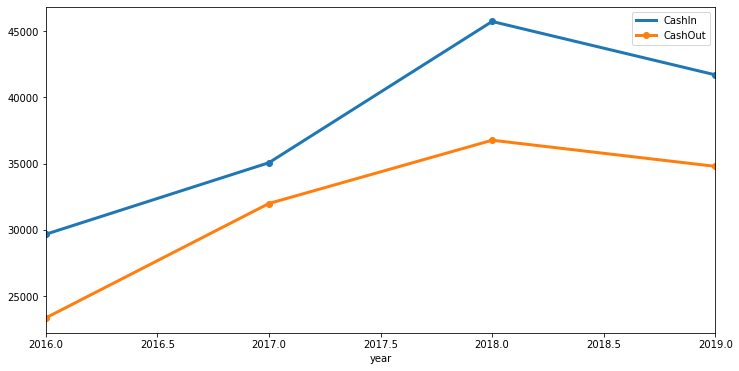

In [28]:
plt.figure(figsize=(12,6))
df.groupby('year')['CashIn'].mean().plot(legend='True',linewidth=3,marker='o')
df.groupby('year')['CashOut'].mean().plot(legend='True',linewidth=3,marker='o')
plt.show()

### Fill missing values
To filling the missing values, moving avarage is used.

In [29]:
for index in df[df["CashIn"].isnull()].index:
    temp=df[(df.year == df.year.at[index]) & (df.week_day==df.week_day.at[index])]["CashIn"].mean()
    df.CashIn.at[index]=temp

In [30]:
for index in df[df["CashOut"].isnull()].index:
    temp=df[(df.year == df.year.at[index]) & (df.week_day==df.week_day.at[index])]["CashOut"].mean()
    df.CashOut.at[index]=temp

all nan values are filled in.

In [31]:
df

,Date,CashIn,CashOut,year,month,day,week_day,weekday_or_weekend
0,2016-01-01,30297.916667,6500.0,2016,1,1,4,0
1,2016-01-02,23961.739130,23110.0,2016,1,2,5,1
2,2016-01-03,16663.541667,7070.0,2016,1,3,6,1
3,2016-01-04,40727.291667,18520.0,2016,1,4,0,0
4,2016-01-05,20840.000000,22200.0,2016,1,5,1,0
...,...,...,...,...,...,...,...,...
1181,2019-03-27,45160.000000,48600.0,2019,3,27,2,0
1182,2019-03-28,39480.000000,22840.0,2019,3,28,3,0
1183,2019-03-29,70260.000000,25950.0,2019,3,29,4,0
1184,2019-03-30,19250.000000,24350.0,2019,3,30,5,1
